In [15]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Modélisation et Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Recharger les jeux de données bruts
co2_emissions = pd.read_csv('co2_emissions_kt_by_country.csv')
sea_level = pd.read_csv('sealevel.csv')
climate_indicators = pd.read_csv('climate_change_indicators.csv')

# Prétraitement des données
# Nettoyer et aligner les années pour chaque dataset

# CO2 emissions: Garder les années globales
co2_emissions_cleaned = co2_emissions.groupby("year")["value"].sum().reset_index()
co2_emissions_cleaned.columns = ["Year", "CO2_Emissions"]

# Sea level: Garder la moyenne annuelle de GMSL
sea_level_cleaned = sea_level.groupby("Year")["GMSL_noGIA"].mean().reset_index()
sea_level_cleaned.columns = ["Year", "Sea_Level"]

# Climate indicators: Garder les températures moyennes pour les années disponibles
temperature_data = climate_indicators[climate_indicators["Indicator"].str.contains("Temperature change", case=False)]
temperature_data = temperature_data.iloc[:, 3:].mean().reset_index()
temperature_data.columns = ["Year", "Average_Temperature"]
temperature_data["Year"] = temperature_data["Year"].str.extract('(\d+)').astype(int)

# Fusionner les datasets
merged_data = co2_emissions_cleaned.merge(sea_level_cleaned, on="Year", how="inner")
merged_data = merged_data.merge(temperature_data, on="Year", how="inner")

# Vérifier les données combinées
merged_data.head()


C:\Users\remyd\AppData\Local\Temp\ipykernel_21896\1632069523.py:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temperature_data = temperature_data.iloc[:, 3:].mean().reset_index()


,Year,CO2_Emissions,Sea_Level,Average_Temperature
0,1993,1.794468e+08,-34.605405,0.215986
1,1994,1.797755e+08,-30.951081,0.609514
2,1995,1.856091e+08,-28.645946,0.629238
3,1996,1.891167e+08,-26.596389,0.279229
4,1997,1.920132e+08,-22.682432,0.543995


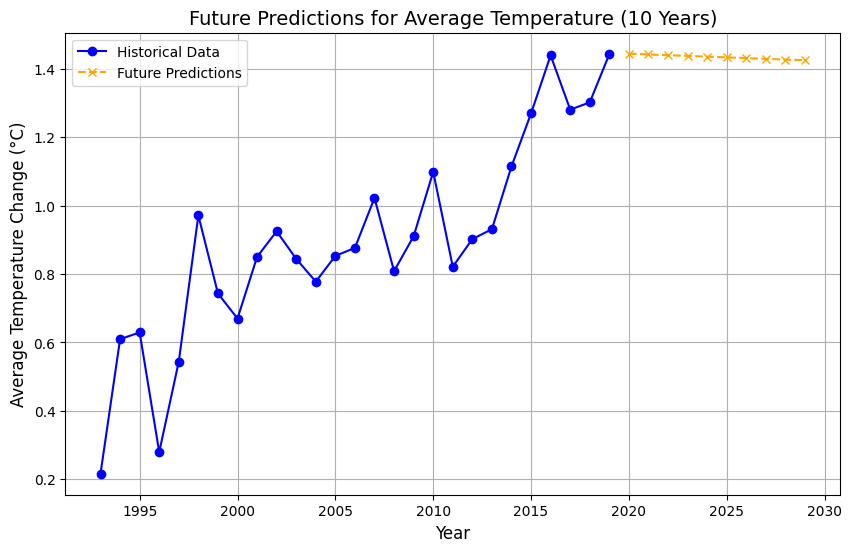

In [16]:
# Générer des données futures pour les 10 prochaines années
future_years = np.arange(merged_data["Year"].max() + 1, merged_data["Year"].max() + 11)
future_co2_emissions = np.linspace(merged_data["CO2_Emissions"].iloc[-1] * 1.01, merged_data["CO2_Emissions"].iloc[-1] * 1.1, 10)
future_sea_level = np.linspace(merged_data["Sea_Level"].iloc[-1] * 1.01, merged_data["Sea_Level"].iloc[-1] * 1.1, 10)

# Créer le tableau des données futures
future_data = np.column_stack((future_co2_emissions, future_sea_level))

# Prédire les températures moyennes futures avec le modèle de régression linéaire
future_temperature_predictions = lr_model.predict(future_data)

# Afficher les prédictions futures dans un graphique
plt.figure(figsize=(10, 6))
plt.plot(merged_data["Year"], merged_data["Average_Temperature"], label="Historical Data", marker="o", color="blue")
plt.plot(future_years, future_temperature_predictions, label="Future Predictions", marker="x", linestyle="--", color="orange")
plt.title("Future Predictions for Average Temperature (10 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature Change (°C)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
